In [1]:
import pandas as pd
from collections import Counter
import matplotlib.pyplot as plt
import seaborn as sb

In [2]:
df = pd.read_csv(r"chess_games.csv")
df.drop(["game_id", "turns", "victory_status","time_increment","white_id", "black_id", "opening_moves", "opening_code","opening_shortname","opening_fullname","opening_variation","opening_response", "rated"], axis = 1, inplace = True)
df.dropna()
print(df)


      winner  white_rating  black_rating  \
0      White          1500          1191   
1      Black          1322          1261   
2      White          1496          1500   
3      White          1439          1454   
4      White          1523          1469   
...      ...           ...           ...   
20053  White          1691          1220   
20054  Black          1233          1196   
20055  White          1219          1286   
20056  White          1360          1227   
20057  Black          1235          1339   

                                                   moves  
0      d4 d5 c4 c6 cxd5 e6 dxe6 fxe6 Nf3 Bb4+ Nc3 Ba5...  
1      d4 Nc6 e4 e5 f4 f6 dxe5 fxe5 fxe5 Nxe5 Qd4 Nc6...  
2      e4 e5 d3 d6 Be3 c6 Be2 b5 Nd2 a5 a4 c5 axb5 Nc...  
3      d4 d5 Nf3 Bf5 Nc3 Nf6 Bf4 Ng4 e3 Nc6 Be2 Qd7 O...  
4      e4 e5 Nf3 d6 d4 Nc6 d5 Nb4 a3 Na6 Nc3 Be7 b4 N...  
...                                                  ...  
20053  d4 f5 e3 e6 Nf3 Nf6 Nc3 b6 Be2 Bb7 O-O Be7 Ne5...  

In [3]:
def getratingWinner():
    white = df['white_rating']
    black = df['black_rating']
    rating = []
    for i in range(0,len(white)):
        if white[i] > black[i]:
            rating.append("White")
        elif black[i] > white[i]:
            rating.append("Black")
        else:
            rating.append("Equal")
            
    return rating
    

In [4]:
result = getratingWinner()

In [5]:
def actualWinner():
    winner = df['winner']
    yes = 0
    no = 0
    equals = 0
    for i in range(0,len(winner)):
        if result[i]==winner[i]:
            yes+=1
        if result[i]!=winner[i]:
            no+=1
        if result[i]=='Equal':
            equals+=1
            
    return yes,no,equals

In [6]:
results = actualWinner()
results

(12352, 7706, 203)

In [7]:
total= results[0]+results[1]+results[2]
print("Percent of Higher Rated being winner =  " + str(round((results[0]/total)*100)) + "%")
print("Percent of Lower Rated being winner = " + str(round((results[1]/total)*100)) + "%")
print("Percent of Equal Ratings =  " + str(round((results[2]/total)*100)) + "%")


Percent of Higher Rated being winner =  61%
Percent of Lower Rated being winner = 38%
Percent of Equal Ratings =  1%


In [8]:
#fill missing black values with 0 
moves = df['moves']
for i in range(0, len(moves)):
    nmove = moves[i].split()
    if len(nmove)<=1:
        nmove.append('0')

In [9]:

#Getting how many times an opening move is used for white and black pieces
moves = df['moves']
wopening = []
bopening = []
for i in range(0,len(moves)):
    nmove = moves[i].split()
    if len(nmove)<=1:
        nmove.append('0')
    wopening.append(nmove[0])
    bopening.append(nmove[1])
wcount = Counter(wopening)
bcount = Counter(bopening)
print(wcount)
print(bcount)

Counter({'e4': 12598, 'd4': 4522, 'Nf3': 725, 'c4': 716, 'e3': 416, 'g3': 186, 'b3': 173, 'f4': 166, 'd3': 131, 'Nc3': 99, 'b4': 88, 'c3': 56, 'g4': 38, 'h4': 33, 'a4': 28, 'a3': 27, 'f3': 23, 'Nh3': 15, 'h3': 14, 'Na3': 4})
Counter({'e5': 6988, 'd5': 3667, 'c5': 2883, 'e6': 2083, 'Nf6': 1693, 'c6': 734, 'd6': 543, 'Nc6': 392, 'g6': 387, 'b6': 286, 'f5': 166, 'a6': 50, 'f6': 41, 'b5': 25, 'h5': 24, 'a5': 23, 'h6': 19, '0': 18, 'g5': 18, 'Nh6': 12, 'Na6': 6})


[4522, 12598, 416, 716, 725, 28, 15, 186, 33, 166, 88, 99, 173, 14, 131, 23, 38, 27, 56, 4]
['d4', 'e4', 'e3', 'c4', 'Nf3', 'Others']
[4522, 12598, 416, 716, 725, 1081]


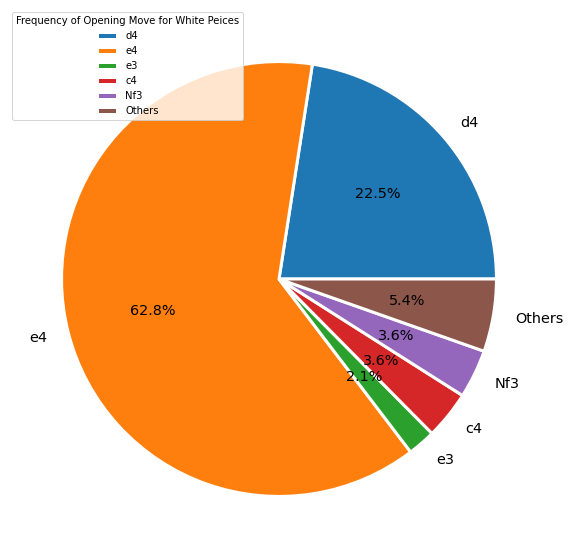

In [10]:
#white opening move pie chart
wdata = []
wlabel = []
for key, value in wcount.items():
    wdata.append(value)
    wlabel.append(key)
print(wdata)
#making data more readable for piechart
new_wlabel = wlabel[:5]
new_wlabel.append("Others")
print(new_wlabel)

new_wdata = wdata[:5]
new_wdata.append(1081)
print(new_wdata)

#Creating Pie Chart for White data
plt.subplots(figsize=(10, 10))
plt.pie(new_wdata, labels = new_wlabel, autopct='%.1f%%', wedgeprops={'linewidth': 3.0, 'edgecolor': 'white'},textprops={'size': 'x-large'})
plt.legend(title = "Frequency of Opening Move for White Peices")
plt.show()

[3667, 392, 6988, 2883, 2083, 387, 1693, 166, 543, 734, 24, 19, 50, 286, 25, 41, 12, 18, 18, 23, 6]
['d5', 'Nc6', 'e5', 'c5', 'e6', 'Others']
[3667, 392, 6988, 2883, 2083, 1081]


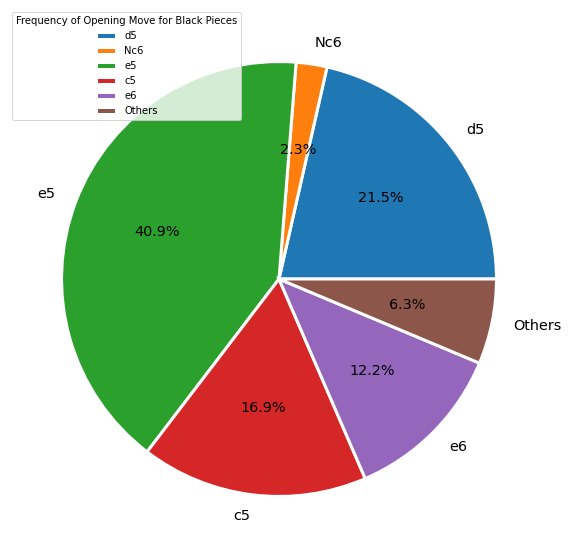

In [11]:
#black opening move pie chart
bdata = []
blabel = []
for key, value in bcount.items():
    bdata.append(value)
    blabel.append(key)
print(bdata)
#making data more readable for piechart
new_blabel = blabel[:5]
new_blabel.append("Others")
print(new_blabel)

new_bdata = bdata[:5]
new_bdata.append(1081)
print(new_bdata)

#Creating Pie Chart for Black data
plt.subplots(figsize=(10, 10))
plt.pie(new_bdata, labels = new_blabel, autopct='%.1f%%', wedgeprops={'linewidth': 3.0, 'edgecolor': 'white'},textprops={'size': 'x-large'})
plt.legend(title = "Frequency of Opening Move for Black Pieces")
plt.show()

[4522, 12598, 416, 716, 725, 28, 15, 186, 33, 166, 88, 99, 173, 14, 131, 23, 38, 27, 56, 4]


<AxesSubplot:xlabel='Opening Move', ylabel='Frequency'>

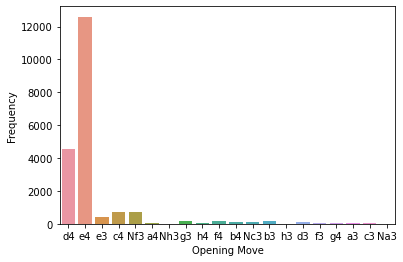

In [12]:
#Using manipulated data from earlier and puting into separate data frame so that its easier to plot in seaborn
white = {"Opening Move": wlabel, 
          "Frequency": wdata}
print(wdata)
wdf = pd.DataFrame(white)

sb.barplot(data=wdf, x="Opening Move", y="Frequency")

[3667, 392, 6988, 2883, 2083, 387, 1693, 166, 543, 734, 24, 19, 50, 286, 25, 41, 12, 18, 18, 23, 6]


<AxesSubplot:xlabel='Opening Move', ylabel='Frequency'>

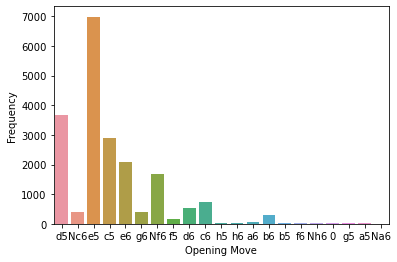

In [13]:
#Using manipulated data from earlier and puting into separate data frame so that its easier to plot in seaborn
black = {"Opening Move": blabel, 
          "Frequency": bdata}
print(bdata)
bdf = pd.DataFrame(black)

sb.barplot(data=bdf, x="Opening Move", y="Frequency")

In [14]:
#Gets indeces of all White and Black winnings and puts into separate list
winner = df['winner']
winner = list(winner)
wposition = []
bposition = []
for index in range(len(winner)):
    if winner[index] == 'White':
        wposition.append(index)
    if winner[index] == 'Black':
        bposition.append(index)

#Using the indeces of all winning pieces, it will get the opening move used for winning side
wopening_winner = []
for i in wposition:
    wopening_winner.append(wopening[i])

bopening_winner = []
for x in bposition:
    bopening_winner.append(bopening[x])

#prints occurences of opening move of winning side
wwincount = Counter(wopening_winner)
bwincount = Counter(bopening_winner)
print(wwincount)

Counter({'e4': 6371, 'd4': 2258, 'c4': 383, 'Nf3': 373, 'e3': 142, 'g3': 85, 'b3': 82, 'f4': 68, 'd3': 50, 'b4': 48, 'Nc3': 42, 'c3': 31, 'a3': 17, 'g4': 11, 'Nh3': 9, 'a4': 9, 'f3': 8, 'h3': 7, 'h4': 6, 'Na3': 1})


<AxesSubplot:xlabel='Opening Move', ylabel='Frequency'>

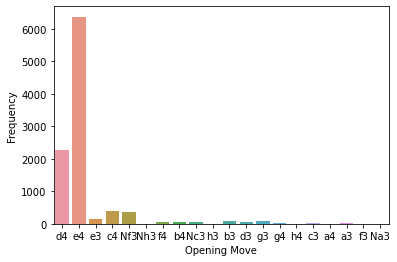

In [15]:
wwindata = []
wwinlabel = []
for key, value in wwincount.items():
    wwindata.append(value)
    wwinlabel.append(key)

Winwhite = {"Opening Move": wwinlabel, 
          "Frequency": wwindata}

wdf2 = pd.DataFrame(Winwhite)

sb.barplot(data=wdf2, x="Opening Move", y="Frequency")

<AxesSubplot:xlabel='Opening Move', ylabel='Frequency'>

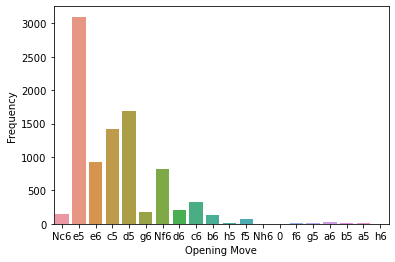

In [16]:
bwindata = []
bwinlabel = []
for key, value in bwincount.items():
    bwindata.append(value)
    bwinlabel.append(key)

Winblack = {"Opening Move": bwinlabel, 
          "Frequency": bwindata}

bdf2 = pd.DataFrame(Winblack)

sb.barplot(data=bdf2, x="Opening Move", y="Frequency")